# Introduction to Linear Regression

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

||continuous|categorical|
|---|---|---|
|**supervised**|**regression**|classification|
|**unsupervised**|dimension reduction|clustering|

## Motivation

Why are we learning linear regression?
- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

Will be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

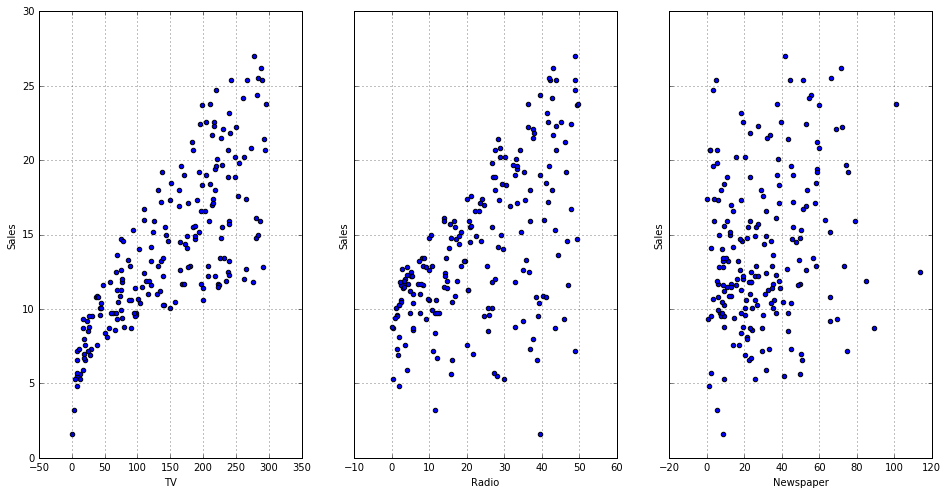

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

<img src="http://nbviewer.jupyter.org/github/justmarkham/DAT4/blob/master/notebooks/08_estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

<img src="http://nbviewer.jupyter.org/github/justmarkham/DAT4/blob/master/notebooks/08_slope_intercept.png">

Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [5]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [6]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [7]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [8]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([ 9.40942557])

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [9]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64